# How do house size, housing median age, median income, ocean proximity and population density influence house prices in Califonia?

## Introduction: 


## Data Cleaning/Loading

In [15]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

In [3]:
#Read the data
housing_data = pd.read_csv("/Users/catherines/Documents/ECO225Project/Data/housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#To identify whether particular columns have any missing data
housing_data.isnull().any(axis = 0)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

Given only "total_bedrooms" column has missing value, fill the missing total bedrooms number as 0 because existed bedrooms number ranges from 1 to 6445

In [5]:
housing_data.fillna(value = 0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Since "ocean_proximity" is a categorical variable in this dataset, it does not have numerical statistics summary. Therefore, I choose to categorize the five categories in "ocean_proximity" into numbers 1-5 based on proximity to the sea. Higher numbers mean farther from the sea.

The representative number for "ISLAND" is 1
The representative number for "NEAR BAY" is 2
The representative number for "NEAR OCEAN" is 3
The representative number for "<1H OCEAN" is 4
The representative number for "INLAND" is 5

In [6]:
#Add the numerical ocean_proximity column
ocean_proximity_mapping = {
    "ISLAND": 1,
    "NEAR BAY": 2,
    "NEAR OCEAN": 3,
    "<1H OCEAN": 4,
    "INLAND": 5
}

housing_data['ocean_proximity_num'] = housing_data['ocean_proximity'].map(ocean_proximity_mapping)

Since there are two variables "total_rooms" and "total_bedrooms" determine the house size jointly, I choose to create a new variable "house_size" to give an idea of the overall spaciousness of a house.
Therefore, through the ratio of total rooms to total bedrooms, we can know the living space each bedroom allocated. This facilitates a fairer comparison of the actual living space of each household and avoids the impact of different housing structures on house size. A higher "house_size" ratio indicating more living space per bedroom.

In [7]:
#Add the new variable of house size
housing_data['house_size'] = housing_data['total_rooms'] / housing_data['total_bedrooms']

## Summary Statistics Tables

In [8]:
#Summary statistics
#Summary statistics of house size
house_size_stats = housing_data["house_size"].describe()
house_size_stats

count    20433.000000
mean         4.984829
std          1.171676
min          1.000000
25%          4.169782
50%          4.922170
75%          5.700364
max         10.000000
Name: house_size, dtype: float64

Interpretation of summary statistics table for "house_size" variable:


In [9]:
#Summary statistics of housing median age
median_age_stats = housing_data["housing_median_age"].describe()
median_age_stats

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

Interpretation of summary statistics table for "housing_median_age" variable:


In [10]:
#Summary statistics of median income
median_income_stats = housing_data["median_income"].describe()
median_income_stats

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

Interpretation of summary statistics table for "median_income" variable:


In [12]:
#Summary statistics of ocean proximity
ocean_stats = housing_data["ocean_proximity"].describe()
ocean_stats

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [13]:
#Summary statistics of ocean proximity after categorizing each geographical group into numerical form
ocean_pro_stats = housing_data["ocean_proximity_num"].describe()
ocean_pro_stats

count    20640.000000
mean         3.965988
std          0.943948
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: ocean_proximity_num, dtype: float64

Interpretation of summary statistics table for "ocean_proximity" and "ocean_proximity_num" variable:

In [14]:
#Summary statistics of population density
pop_stats = housing_data["population"].describe()
pop_stats

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

Interpretation of summary statistics table for "population" variable:


## Plots, Histograms, Figures

## Histograms of independent variables Xs

Histogram of "house_size"

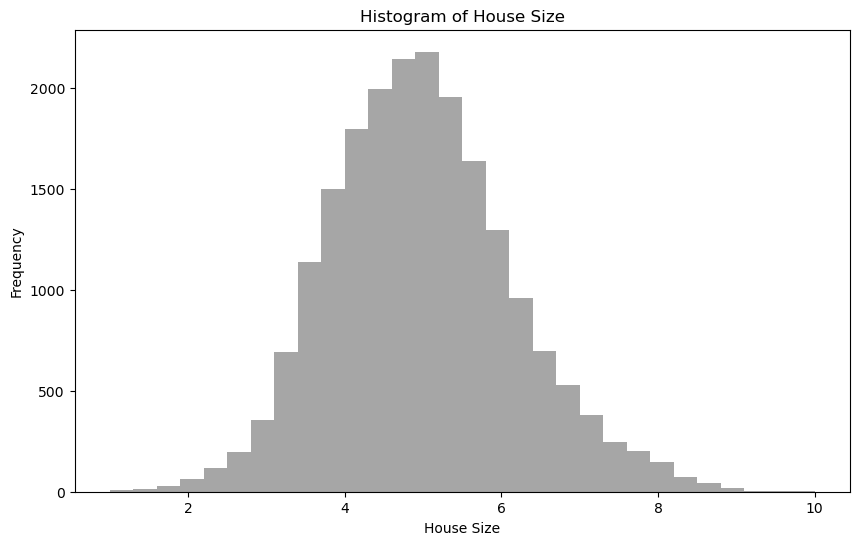

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(housing_data['house_size'], bins=30, alpha=0.7, color='grey')
plt.title('Histogram of House Size')
plt.xlabel('House Size')
plt.ylabel('Frequency')
plt.show()

Histogram of "housing_median_age"

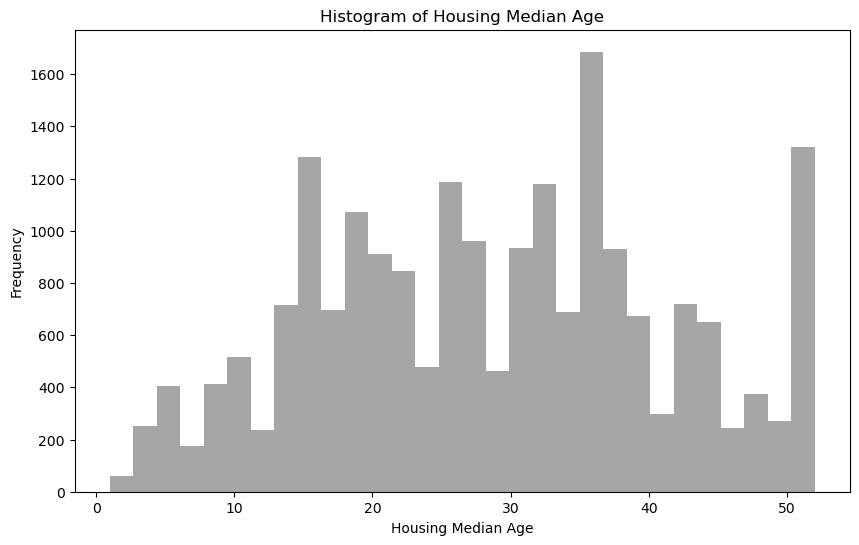

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(housing_data['housing_median_age'], bins=30, alpha=0.7, color='grey')
plt.title('Histogram of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

Histogram of "median_income"

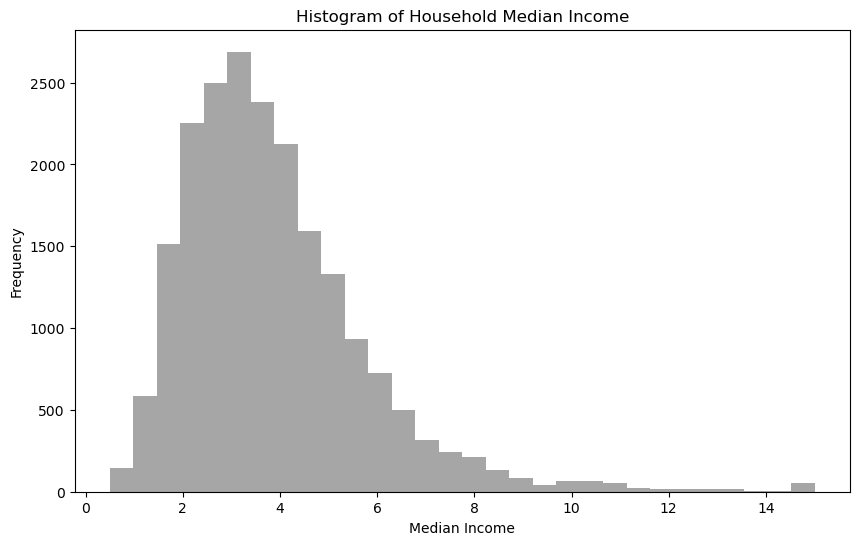

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(housing_data['median_income'], bins=30, alpha=0.7, color='grey')
plt.title('Histogram of Household Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

Bar chart of "ocean_proximity"

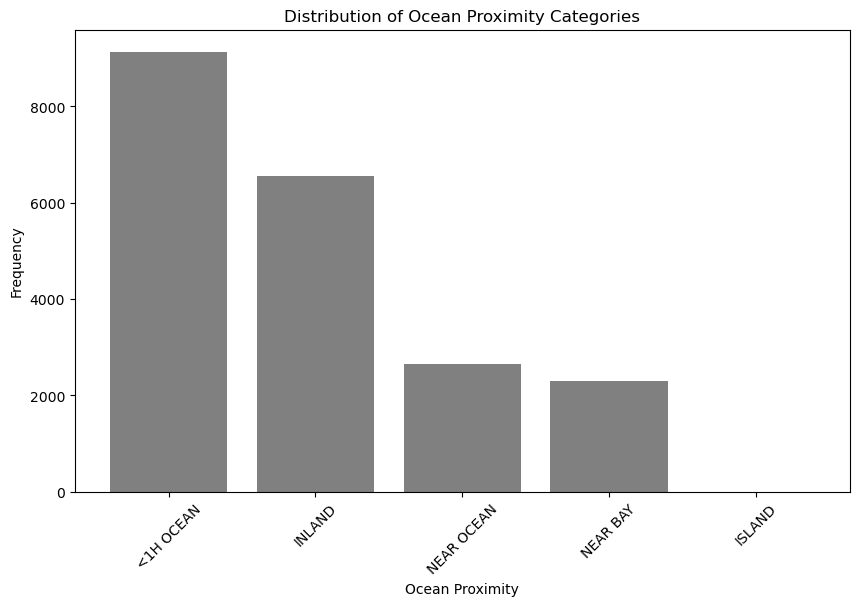

In [23]:
category_counts = housing_data['ocean_proximity'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='grey')
plt.title('Distribution of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Bar chart and Boxplot of "ocean_proximity_num"

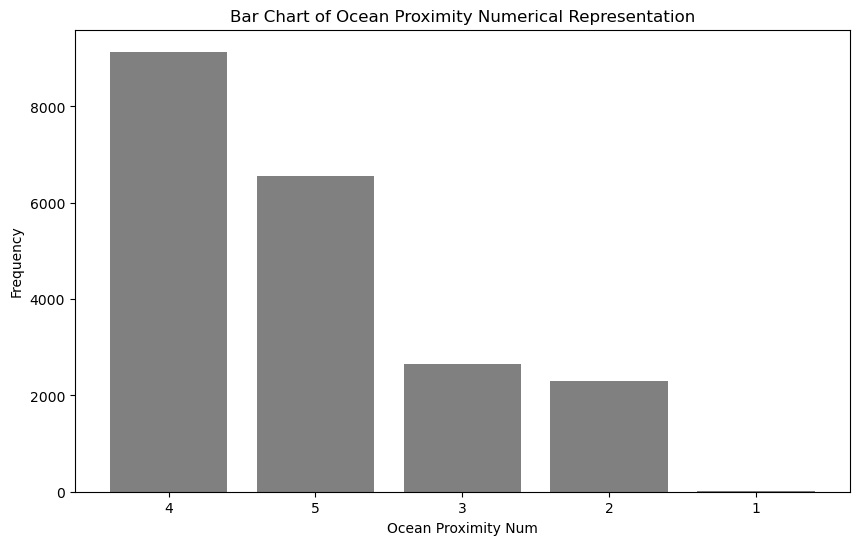

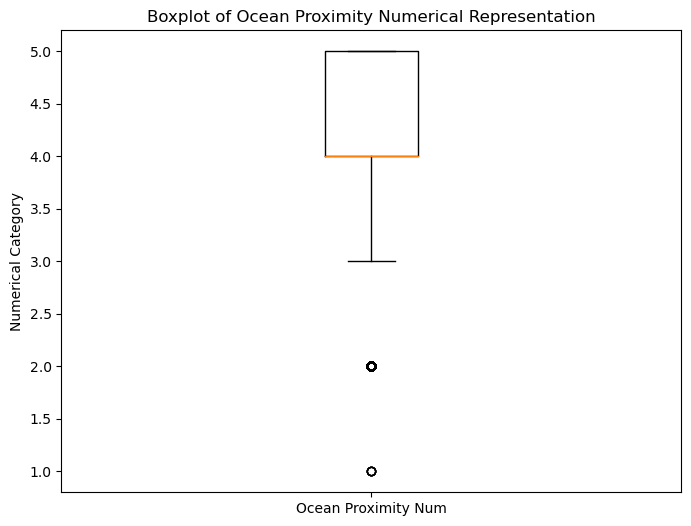

In [27]:
#Bar chart
category_counts = housing_data['ocean_proximity_num'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index.astype(str), category_counts.values, color='grey')
plt.title('Bar Chart of Ocean Proximity Numerical Representation')
plt.xlabel('Ocean Proximity Num')
plt.ylabel('Frequency')
plt.show()

#Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(housing_data['ocean_proximity_num'].dropna())
plt.title('Boxplot of Ocean Proximity Numerical Representation')
plt.xticks([1], ['Ocean Proximity Num'])
plt.ylabel('Numerical Category')
plt.show()

Histogram of "population"

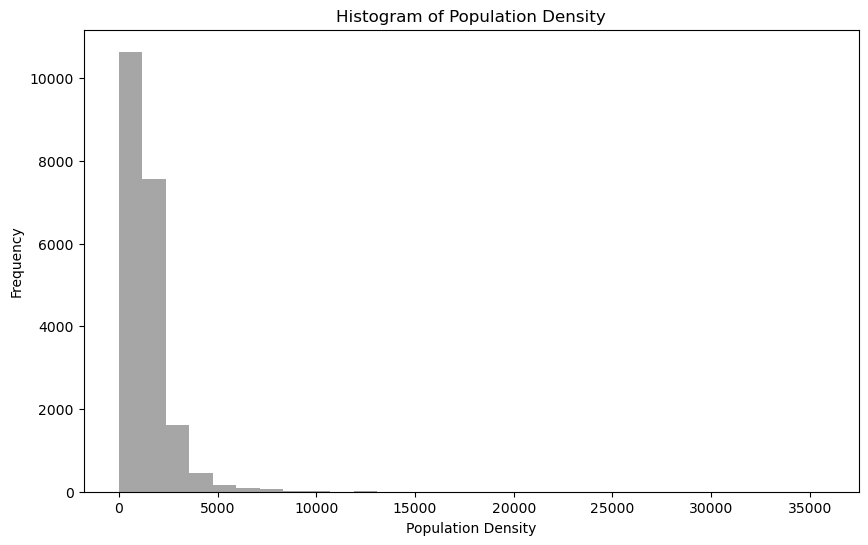

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(housing_data['population'], bins=30, alpha=0.7, color='grey')
plt.title('Histogram of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()